# Binary CNN

In [80]:
# For Data Processing
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import seaborn as sns


# For ML Models
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
import sklearn.metrics as metrics
from tensorflow.keras import regularizers
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense, LeakyReLU
from tensorflow.keras.models import Model

In [13]:
os.getcwd()

'c:\\Users\\jpjon\\OneDrive\\Documents\\aqua_official\\aquawatch\\final_model\\Filtered_Data2'

In [12]:
os.chdir('Filtered_Data2')

In [24]:
#Paths to data directories
no_advisory_dir = './Filtered_Data2/no_advisory'
#warning_dir = './Warning'
caution_dir = './Filtered_Data2/caution'
danger_dir = './Filtered_Data2/danger'

#Pull in training data
no_advisory_data = []
no_advisory_labels = []

warning_data = []
warning_labels = []

caution_data = []
caution_labels = []

danger_data = []
danger_labels = []

#getting the paths and labels of our no_advisory data

for image in os.listdir(no_advisory_dir):
    no_advisory_data.append(no_advisory_dir+'/'+image)
    no_advisory_labels.append('no_advisory')

# #getting the paths and labels of our warning data
# for image in os.listdir(warning_dir):
#     warning_data.append(warning_dir+'/'+image)
#     warning_labels.append('warning')
        
#getting the paths and labels of our caution data
for image in os.listdir(caution_dir):
    caution_data.append(caution_dir+'/'+image)
    caution_labels.append('caution')

#getting the paths and labels of our danger data
for image in os.listdir(danger_dir):
    danger_data.append(danger_dir+'/'+image)
    danger_labels.append('danger')

no_advisory_data, no_advisory_labels = shuffle(no_advisory_data, no_advisory_labels)
warning_data, warning_labels = shuffle(warning_data, warning_labels)
caution_data, caution_labels = shuffle(caution_data, caution_labels)
danger_data, danger_labels = shuffle(danger_data, danger_labels)

In [25]:
df_no_advisory = pd.DataFrame({'image_path': no_advisory_data, 'label':no_advisory_labels})
#df_warning = pd.DataFrame({'image_path': warning_data, 'label':warning_labels})
df_caution = pd.DataFrame({'image_path': caution_data, 'label':caution_labels})
df_danger = pd.DataFrame({'image_path': danger_data, 'label':danger_labels})

## Distribution of Images

See below for the distribution of images across all microsystin levels.

In [26]:
# append cayuga and clear_lake df
df = pd.concat([df_no_advisory, df_caution, df_danger], ignore_index = True)
df

image_path        label
0    ./Filtered_Data2/no_advisory/BloomImg1-2023061...  no_advisory
1    ./Filtered_Data2/no_advisory/122_image3-202007...  no_advisory
2    ./Filtered_Data2/no_advisory/Image1-20220329-1...  no_advisory
3    ./Filtered_Data2/no_advisory/342_image3-202011...  no_advisory
4    ./Filtered_Data2/no_advisory/BloomImg1-2023070...  no_advisory
..                                                 ...          ...
515               ./Filtered_Data2/danger/5A4309~1.PNG       danger
516  ./Filtered_Data2/danger/BloomImg1-20230804-112...       danger
517  ./Filtered_Data2/danger/2019-0912_DSCN1486_Fla...       danger
518                    ./Filtered_Data2/danger/L1i.png       danger
519                    ./Filtered_Data2/danger/L4s.png       danger

[520 rows x 2 columns]

In [27]:
df['label'].value_counts()

label
no_advisory    211
danger         160
caution        149
Name: count, dtype: int64

In [28]:
# Stratify by microsystin levels
train_df = df.copy()

In [29]:
# Define a dictionary with the mappings
label_mapping = {
    'no_advisory': 0,
    'caution': 1,
    'danger': 1
}

# Create the 'encoded_labels' column
train_df['encoded_labels'] = train_df['label'].map(label_mapping)
#test_df['encoded_labels'] = test_df['label'].map(label_mapping)

In [30]:
train_df['encoded_labels'].value_counts()

encoded_labels
1    309
0    211
Name: count, dtype: int64

In [31]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = train_df[train_df['encoded_labels'] == 1]
minority_class = train_df[train_df['encoded_labels'] == 0]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the number in the majority class
                              random_state=42)  # Set a random seed for reproducibility

# Concatenate the majority class and upsampled minority class
upsampled_train_df = pd.concat([majority_class, minority_upsampled])

# Shuffle the DataFrame to mix the classes
upsampled_train_df = upsampled_train_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [32]:
upsampled_train_df['encoded_labels'].value_counts()

encoded_labels
1    309
0    309
Name: count, dtype: int64

## Visualize the Images

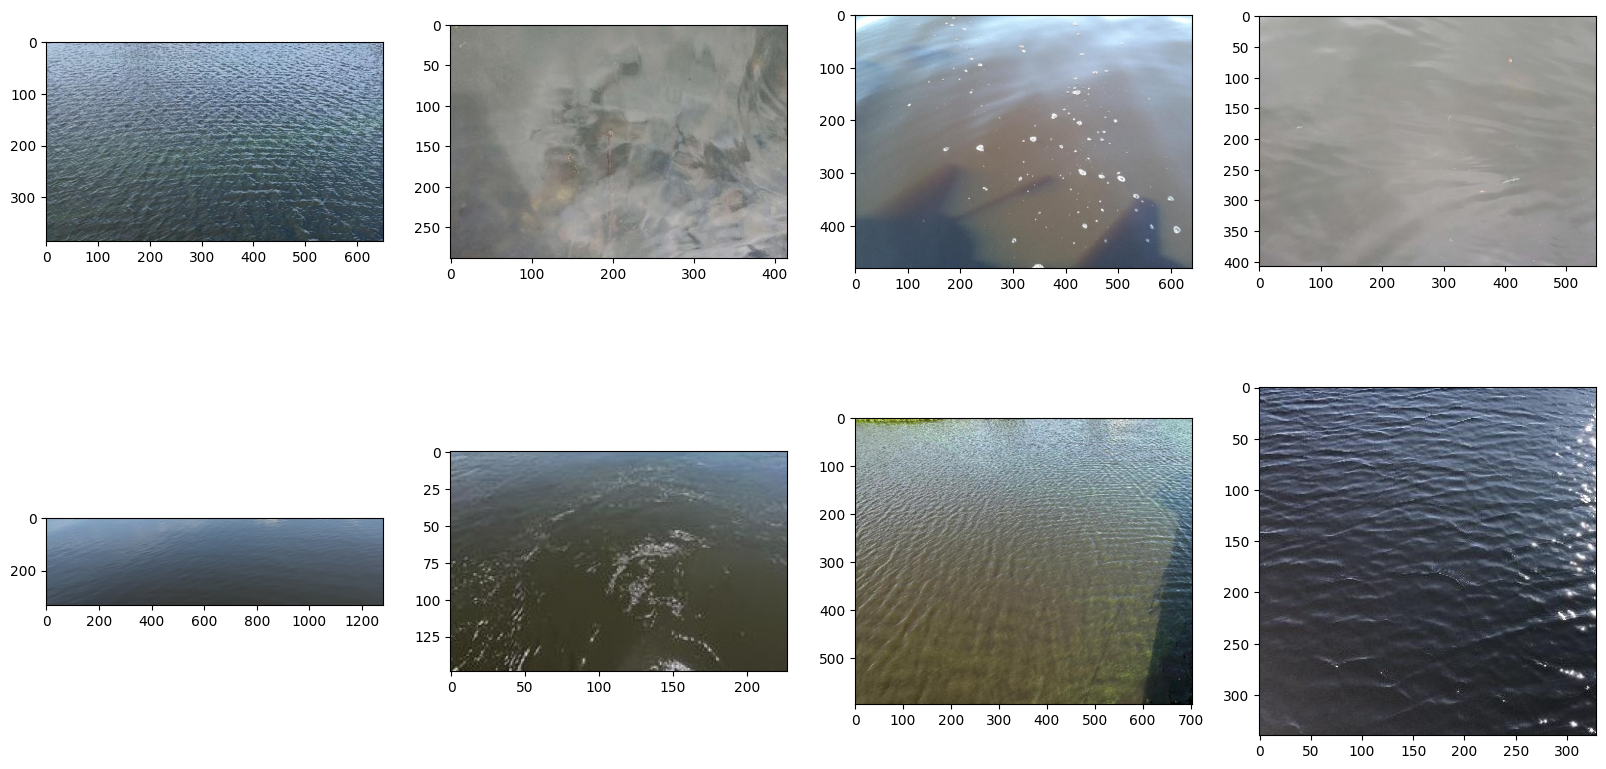

In [33]:
#check first few images of no_advisory
images = []
for idx, img in enumerate(df_no_advisory.image_path):
    img = load_img(
    img)
    images.append(img)
    
nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
indx = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i,j].imshow(images[indx])
        indx += 1

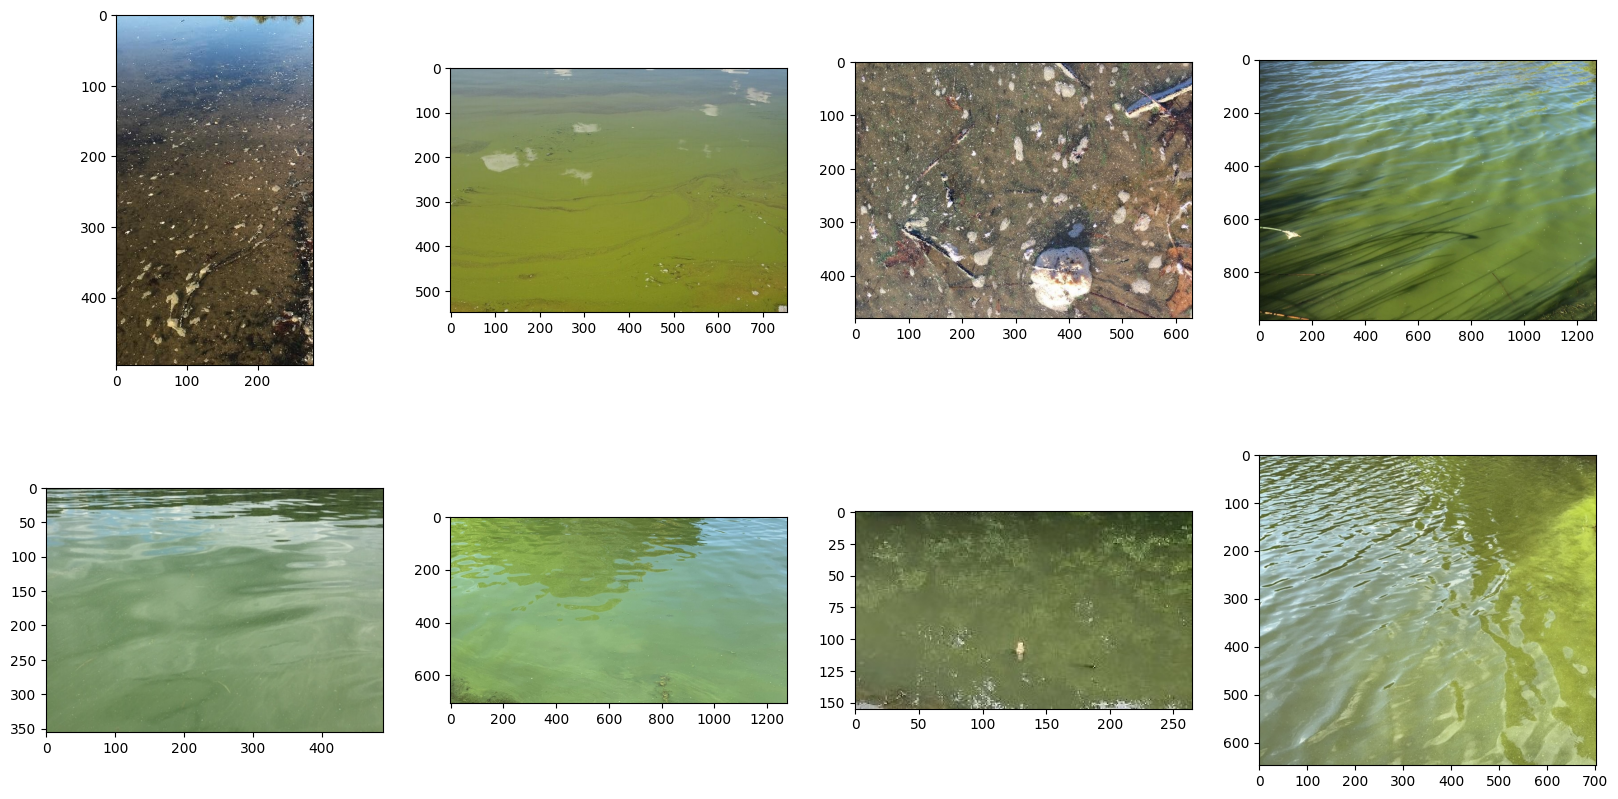

In [34]:
#check first few images of caution
images = []
for idx, img in enumerate(df_caution.image_path):
    img = load_img(
    img)
    images.append(img)
    
nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
indx = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i,j].imshow(images[indx])
        indx += 1

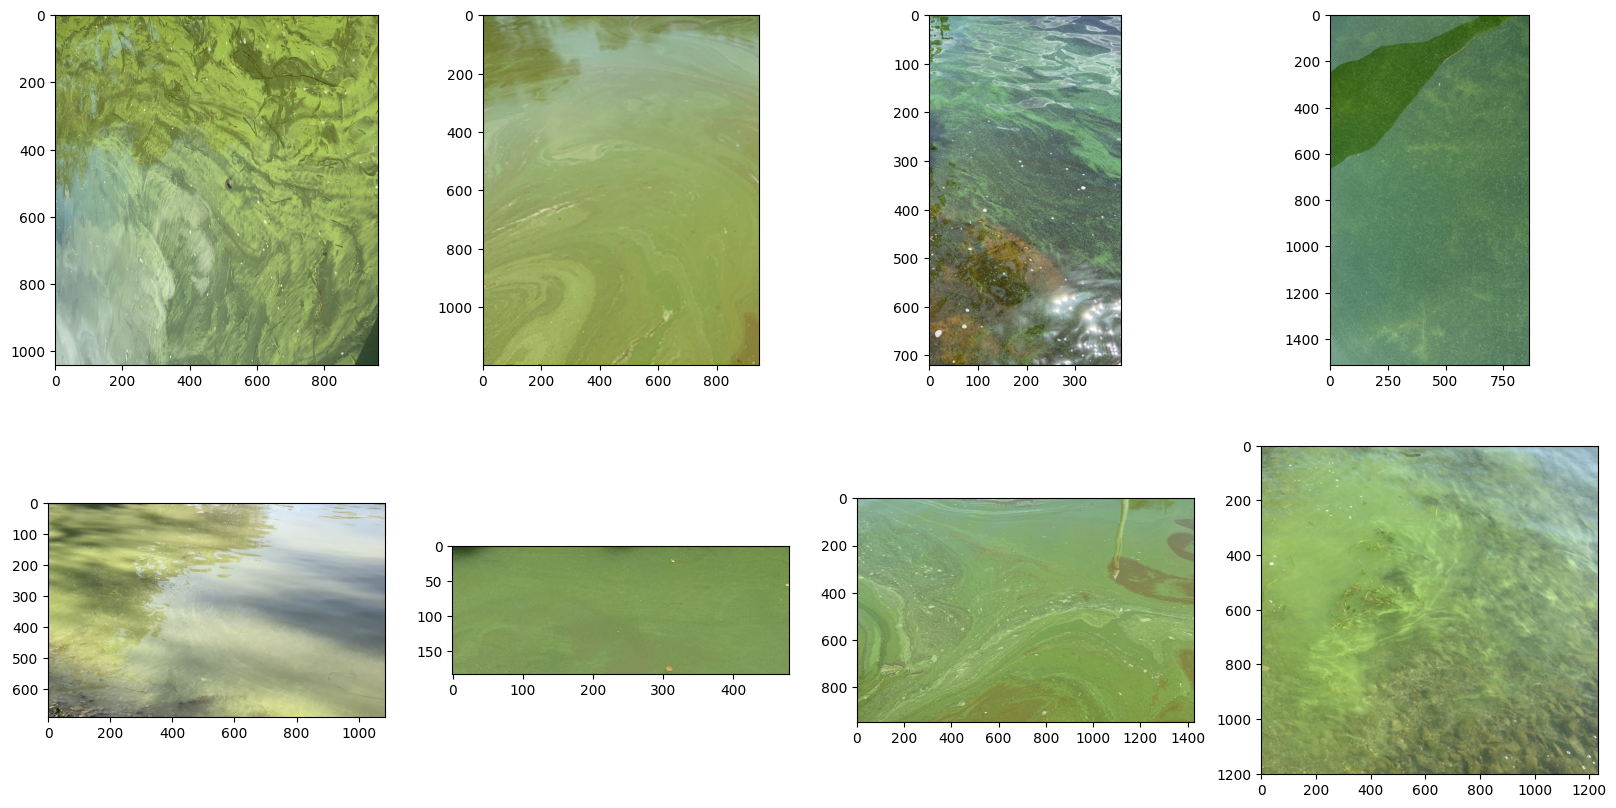

In [35]:
#check first few images of danger
images = []
for idx, img in enumerate(df_danger.image_path):
    img = load_img(
    img)
    images.append(img)
    
nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
indx = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i,j].imshow(images[indx])
        indx += 1

## Size of the Images 

In [36]:
#Changing test set to match format of training data. This is independent to the following preprocessing functions because augmentations are not required
def preprocess1(data):
    images_mini = []
    
    #basically two arrays with images and labels
    for img in (data.image_path):
        img = load_img(img, target_size = (224,224))
        
        img = img_to_array(img)
        
        images_mini.append(img)
    #turns the array into a numpy array with each element in a seperate dimension
    images_mini = np.stack(images_mini)
    y_mini = np.array(data.encoded_labels).flatten()
    return images_mini, y_mini

In [37]:
#X_test, y_test = preprocess1(test_df)
images_mini, y_mini = preprocess1(upsampled_train_df)
print(f"images_mini shape {images_mini.shape}")
print(f"y_mini shape {y_mini.shape}")

images_mini shape (618, 224, 224, 3)
y_mini shape (618,)


In [38]:
tf.random.set_seed(1234)

fig = plt.figure(figsize=(14, 12))

# pull first image from data
image = images_mini[0]

# plot original
ax = fig.add_subplot(1, 5, 1)
ax.imshow(array_to_img(image))
ax.set_title('Original', size=15);

# resize
ax = fig.add_subplot(1, 5, 2)
img_resize = tf.image.resize(image, size=(224, 224))
ax.imshow(array_to_img(img_resize))
ax.set_title('Step 1: Resize', size=15);


# adjust brightness
ax = fig.add_subplot(1, 5, 3)
img_bright = tf.image.adjust_brightness(img_resize, 0.3)
ax.imshow(array_to_img(img_bright))
ax.set_title('Step 2: Brightness', size=15);


# adjust contrast
ax = fig.add_subplot(1, 5, 4)
img_contrast = tf.image.adjust_contrast(img_bright, contrast_factor=3)
ax.imshow(array_to_img(img_contrast))
ax.set_title('Step 3: Contrast', size=15);


# flip left right
ax = fig.add_subplot(1, 5, 5)
img_flip = tf.image.flip_left_right(img_contrast)
ax.imshow(array_to_img(img_flip))
ax.set_title('Step 4: Flip left right', size=15);

# Data Preprocessing

## Data Augmentation

In [39]:
contrast = 3
DELTA = 0.3

def preprocess2(images_mini, y_mini, split= (0.8,0.2)):
    tf.random.set_seed(1234)
    np.random.seed(1234)
    shuffle = np.random.permutation(np.arange(images_mini.shape[0]))
    images_mini, y_mini = images_mini[shuffle], y_mini[shuffle]
    
    #splits for validation
    splits = np.multiply(len(images_mini), split).astype(int)
    X_train, X_val = np.split(images_mini, [splits[0]])
    y_train, y_val = np.split(y_mini, [splits[0]])
    
    #greyscaling
    X_train = X_train/255.0
    X_val = X_val/255.0
    
    #image augmentation
    X_train_augm = tf.image.adjust_brightness(X_train, delta = DELTA)
    X_train_augm = tf.image.adjust_contrast(X_train_augm, contrast_factor = contrast)
    
    #flip
    X_train_augm = tf.image.random_flip_left_right(X_train_augm)
    
    #concatenate original and augmented
    X_train = tf.concat([X_train, X_train_augm], axis = 0)
    
    #concatenate y_train
    y_train_augm = y_train
    y_train = tf.concat([y_train, y_train_augm], axis = 0)
    
    #Shuffle
    shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype = tf.int32))
    X_train = tf.gather(X_train, shuffle)
    y_train = tf.gather(y_train, shuffle).numpy()
    
    return X_train, y_train, X_val, y_val

In [40]:
X_train, y_train, X_val, y_val = preprocess2(
    images_mini,
    y_mini,
    split=(0.8,0.2)
)

In [41]:
#We have 5104 observations, each having 200x200 pixels, with each pixel having 3 values (which are all the same because they've been greyscaled)
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")

X_train shape (988, 224, 224, 3)
y_train shape (988,)
X_val shape (124, 224, 224, 3)
y_val shape (124,)


In [42]:
# print taining data
print('Print training data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_train[i]))
    axs[i].set(title=y_train[i])

Print training data examples:


In [43]:
print('Print validation data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_val[i]))
    axs[i].set(title=y_val[i])

Print validation data examples:


# Binary Case

In [44]:
X_train.shape, y_train.shape

(TensorShape([988, 224, 224, 3]), (988,))

In [45]:
X_train

<tf.Tensor: shape=(988, 224, 224, 3), dtype=float32, numpy=
array([[[[ 0.5686275 ,  0.6862745 ,  0.78039217],
         [ 0.57254905,  0.6901961 ,  0.78431374],
         [ 0.57254905,  0.69411767,  0.7764706 ],
         ...,
         [ 0.32156864,  0.3882353 ,  0.45882353],
         [ 0.34901962,  0.41568628,  0.4862745 ],
         [ 0.29803923,  0.3647059 ,  0.43529412]],

        [[ 0.5686275 ,  0.6862745 ,  0.78039217],
         [ 0.57254905,  0.6901961 ,  0.78431374],
         [ 0.57254905,  0.69411767,  0.7764706 ],
         ...,
         [ 0.32156864,  0.3882353 ,  0.45882353],
         [ 0.34901962,  0.41568628,  0.4862745 ],
         [ 0.29803923,  0.3647059 ,  0.43529412]],

        [[ 0.5686275 ,  0.6862745 ,  0.78039217],
         [ 0.5686275 ,  0.6862745 ,  0.78039217],
         [ 0.57254905,  0.69411767,  0.7764706 ],
         ...,
         [ 0.4392157 ,  0.5058824 ,  0.5764706 ],
         [ 0.44313726,  0.5176471 ,  0.58431375],
         [ 0.41568628,  0.48235294,  0.55294

In [46]:
def residual_block(x, filters, kernel_size=3, stride=1):
    y = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = LeakyReLU(alpha=0.01)(y)
    y = Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = BatchNormalization()(y)
    y = LeakyReLU(alpha=0.01)(y)
    if stride > 1:
        x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    out = Add()([x, y])
    out = LeakyReLU(alpha=0.01)(out)
    return out

def build_resnet(input_shape, num_blocks, num_classes=1):
    input_tensor = Input(shape=input_shape)
    
    x = Conv2D(64, kernel_size=7, strides=2, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    
    for _ in range(num_blocks):
        x = residual_block(x, filters=64)
    
    x = GlobalAveragePooling2D()(x)
    output_tensor = Dense(num_classes, activation='sigmoid')(x)
    
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    return model

# Create the ResNet model
input_shape = (224, 224, 3)
num_blocks = 3
model = build_resnet(input_shape, num_blocks)

# Compile the model with metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.AUC(name='auc')])

# Train the model for more epochs
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
31/31 [==============================] - 19s 584ms/step - loss: 1.4658 - accuracy: 0.5830 - precision: 0.5384 - recall: 0.9937 - auc: 0.8241 - val_loss: 0.5927 - val_accuracy: 0.5806 - val_precision: 0.5702 - val_recall: 1.0000 - val_auc: 0.9398
Epoch 2/20
31/31 [==============================] - 19s 624ms/step - loss: 0.4359 - accuracy: 0.8492 - precision: 0.8140 - recall: 0.8938 - auc: 0.9232 - val_loss: 0.5285 - val_accuracy: 0.8387 - val_precision: 0.9804 - val_recall: 0.7246 - val_auc: 0.9651
Epoch 3/20
31/31 [==============================] - 20s 638ms/step - loss: 0.2689 - accuracy: 0.8968 - precision: 0.8954 - recall: 0.8917 - auc: 0.9612 - val_loss: 0.5446 - val_accuracy: 0.6935 - val_precision: 1.0000 - val_recall: 0.4493 - val_auc: 0.9718
Epoch 4/20
31/31 [==============================] - 20s 632ms/step - loss: 0.2716 - accuracy: 0.8947 - precision: 0.9052 - recall: 0.8750 - auc: 0.9575 - val_loss: 0.6678 - val_accuracy: 0.5726 - val_precision: 1.0000 - val_recal

4/4 [==============================] - 1s 119ms/step


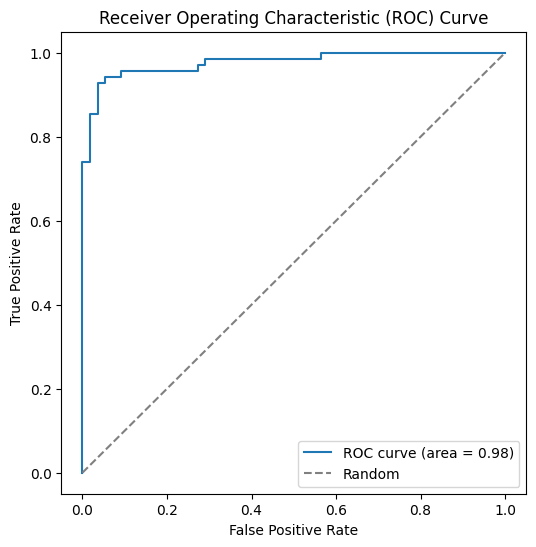

In [48]:
# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
precision, recall, _ = precision_recall_curve(y_val, y_val_pred)

# Plotting
plt.figure(figsize=(18, 6))

# Plot loss and accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot precision-recall curve
plt.subplot(1, 3, 3)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

### Hyperparameter Tuning for Binary 1 (No_advisory & Caution/Danger)

In [51]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import Hyperband

# Define your training and validation data (X_train, y_train, X_val, y_val)

def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(224, 224, 3)))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(10))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

# Instantiate the tuner
tuner = Hyperband(model_builder,
                  objective='val_accuracy',
                  max_epochs=10,
                  factor=3)  

# Search for the best hyperparameter configuration
tuner.search(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

# Access the best hyperparameters
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print("Best Hyperparameters:", best_hyperparameters)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 30 Complete [00h 00m 16s]
val_accuracy: 0.9354838728904724

Best val_accuracy So Far: 0.9435483813285828
Total elapsed time: 00h 05m 04s
Best Hyperparameters: {'units': 480, 'learning_rate': 0.0001, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0018'}


In [52]:
X_val.shape

(124, 224, 224, 3)

# Binary 2 (caution & danger)

In [53]:
# append cayuga and clear_lake df
df = pd.concat([df_caution, df_danger], ignore_index = True)
train_df = df.copy()

In [54]:
# Define a dictionary with the mappings
label_mapping = {
    'caution': 0,
    'danger': 1
}

# Create the 'encoded_labels' column
train_df['encoded_labels'] = train_df['label'].map(label_mapping)
#test_df['encoded_labels'] = test_df['label'].map(label_mapping)

In [55]:
print(train_df.label.value_counts())

label
danger     160
caution    149
Name: count, dtype: int64


In [56]:
train_df

image_path    label  \
0    ./Filtered_Data2/caution/352_image1-20201201-s...  caution   
1    ./Filtered_Data2/caution/Wheatland #3 picture ...  caution   
2    ./Filtered_Data2/caution/352_image3-20201201-s...  caution   
3    ./Filtered_Data2/caution/2019-0828_IMG_1536_Sa...  caution   
4                     ./Filtered_Data2/caution/L4o.png  caution   
..                                                 ...      ...   
304               ./Filtered_Data2/danger/5A4309~1.PNG   danger   
305  ./Filtered_Data2/danger/BloomImg1-20230804-112...   danger   
306  ./Filtered_Data2/danger/2019-0912_DSCN1486_Fla...   danger   
307                    ./Filtered_Data2/danger/L1i.png   danger   
308                    ./Filtered_Data2/danger/L4s.png   danger   

     encoded_labels  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
..              ...  
304               1  
305               1  
306               1  
307               1  
308               1  

[309 rows x 3 columns]

In [57]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = train_df[train_df['encoded_labels'] == 1]
minority_class = train_df[train_df['encoded_labels'] == 0]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the number in the majority class
                              random_state=42)  # Set a random seed for reproducibility

# Concatenate the majority class and upsampled minority class
upsampled_train_df = pd.concat([majority_class, minority_upsampled])

# Shuffle the DataFrame to mix the classes
upsampled_train_df = upsampled_train_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [58]:
upsampled_train_df['encoded_labels'].value_counts()

encoded_labels
0    160
1    160
Name: count, dtype: int64

In [59]:
#X_test, y_test = preprocess1(test_df)
images_mini, y_mini = preprocess1(upsampled_train_df)
print(f"images_mini shape {images_mini.shape}")
print(f"y_mini shape {y_mini.shape}")

images_mini shape (320, 224, 224, 3)
y_mini shape (320,)


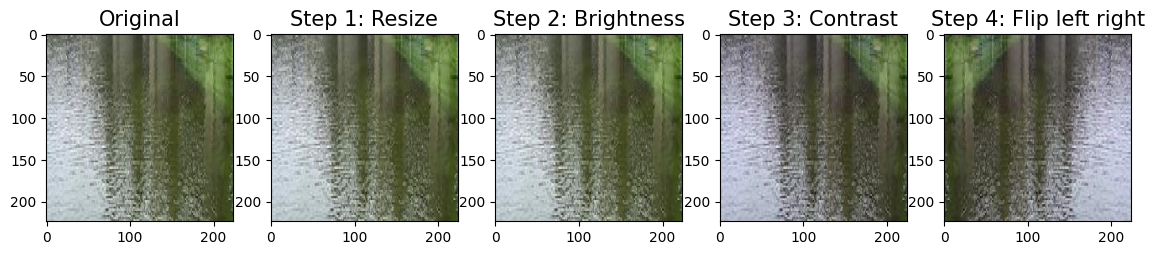

In [60]:
tf.random.set_seed(1234)

fig = plt.figure(figsize=(14, 12))

# pull first image from data
image = images_mini[0]

# plot original
ax = fig.add_subplot(1, 5, 1)
ax.imshow(array_to_img(image))
ax.set_title('Original', size=15);

# resize
ax = fig.add_subplot(1, 5, 2)
img_resize = tf.image.resize(image, size=(224, 224))
ax.imshow(array_to_img(img_resize))
ax.set_title('Step 1: Resize', size=15);


# adjust brightness
ax = fig.add_subplot(1, 5, 3)
img_bright = tf.image.adjust_brightness(img_resize, 0.3)
ax.imshow(array_to_img(img_bright))
ax.set_title('Step 2: Brightness', size=15);


# adjust contrast
ax = fig.add_subplot(1, 5, 4)
img_contrast = tf.image.adjust_contrast(img_bright, contrast_factor=3)
ax.imshow(array_to_img(img_contrast))
ax.set_title('Step 3: Contrast', size=15);


# flip left right
ax = fig.add_subplot(1, 5, 5)
img_flip = tf.image.flip_left_right(img_contrast)
ax.imshow(array_to_img(img_flip))
ax.set_title('Step 4: Flip left right', size=15);

In [61]:
X_train, y_train, X_val, y_val = preprocess2(
    images_mini,
    y_mini,
    split=(0.8,0.2)
)

In [62]:
#We have 5104 observations, each having 200x200 pixels, with each pixel having 3 values (which are all the same because they've been greyscaled)
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")

X_train shape (512, 224, 224, 3)
y_train shape (512,)
X_val shape (64, 224, 224, 3)
y_val shape (64,)


In [63]:
# print taining data
print('Print training data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_train[i]))
    axs[i].set(title=y_train[i])

Print training data examples:


Print validation data examples:


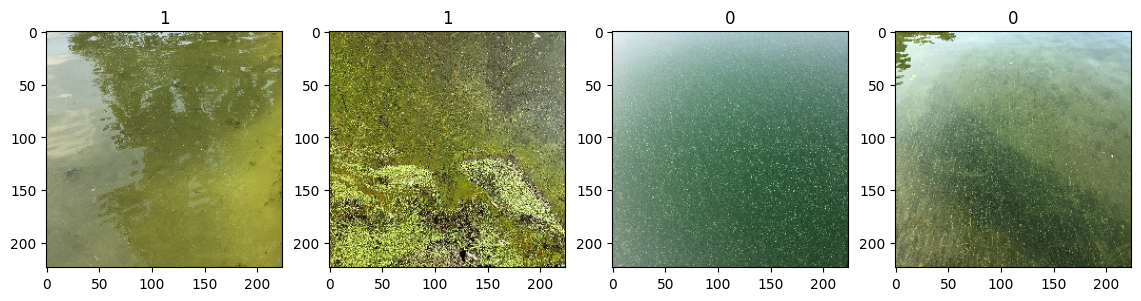

In [64]:
print('Print validation data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_val[i]))
    axs[i].set(title=y_val[i])

In [65]:
X_train.shape, y_train.shape

(TensorShape([512, 224, 224, 3]), (512,))

### Hyperparameter Tuning for Binary 2 (Caution & Danger)

In [72]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import Hyperband
from keras_tuner import Objective


def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(224, 224, 3)))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(10))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

# Instantiate the tuner
tuner = Hyperband(model_builder,
                  objective='val_accuracy',
                  max_epochs=30,
                  factor=3,
                 directory='my_dir',
                    project_name='intro_to_kt2') 

# Search for the best hyperparameter configuration
tuner.search(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

# Access the best hyperparameters
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print("Best Hyperparameters:", best_hyperparameters)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from my_dir\intro_to_kt2\tuner0.json
Best Hyperparameters: {'units': 224, 'learning_rate': 0.001, 'tuner/epochs': 30, 'tuner/initial_epoch': 10, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0047'}


In [73]:
eval_metrics = best_model.evaluate(X_val, y_val)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Loss: {eval_metrics[0]}")
print(f"Accuracy: {eval_metrics[1]}")

2/2 [==============================] - 0s 12ms/step - loss: 1.0203 - accuracy: 0.8438
Evaluation Metrics:
Loss: 1.0202637910842896
Accuracy: 0.84375


2/2 [==============================] - 0s 12ms/step


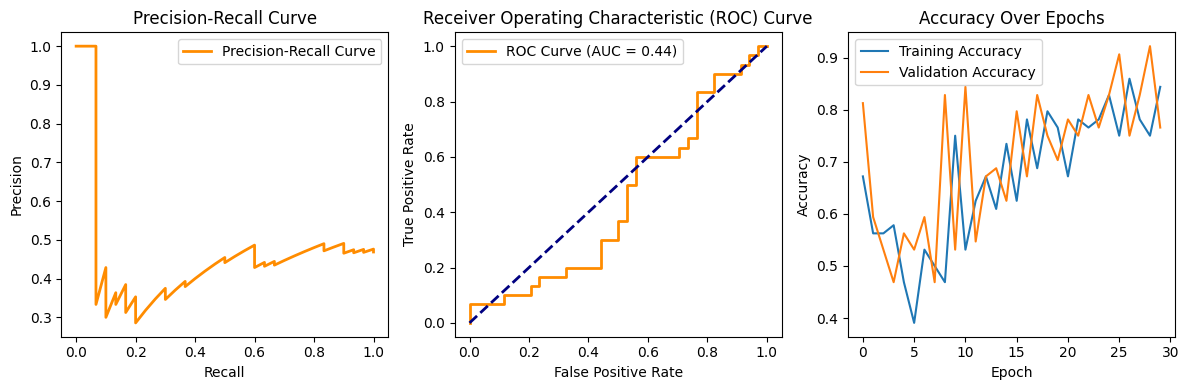

In [74]:
# Predict probabilities on the validation set
y_prob = best_model.predict(X_val)

# Convert probabilities to predicted labels
y_pred = tf.argmax(y_prob, axis=1)

# True labels
y_true = y_val

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_true, y_prob[:, 1])

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot precision-recall curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Plot accuracy over epochs
history = best_model.fit(X_val, y_val, epochs=30, validation_data=(X_val, y_val), verbose=0)
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [75]:
# Define AUC as the objective
auc_obj = Objective("val_auc", direction="max")

def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(224, 224, 3)))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    
    # Output layer for binary classification
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    return model

# Instantiate the tuner
tuner = Hyperband(model_builder,
                  objective=auc_obj,
                  max_epochs=30,
                  factor=3,
                  directory='my_dir',
                  project_name='intro_to_kt3') 

# Search for the best hyperparameter configuration
tuner.search(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

# Access the best hyperparameters
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print("Best Hyperparameters:", best_hyperparameters)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 65 Complete [00h 00m 12s]
val_auc: 0.79313725233078

Best val_auc So Far: 0.8495098948478699
Total elapsed time: 00h 06m 51s
Best Hyperparameters: {'units': 448, 'learning_rate': 0.001, 'tuner/epochs': 30, 'tuner/initial_epoch': 10, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0049'}


In [76]:
print("Best Model Architecture:")
best_model.summary()

Best Model Architecture:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 448)               67436992  
                                                                 
 dense_1 (Dense)             (None, 1)                 449       
                                                                 
Total params: 67,437,441
Trainable params: 67,437,441
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Evaluate the best model on the validation set
evaluation_metrics = best_model.evaluate(X_val, y_val)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Loss:", evaluation_metrics[0])
print("Accuracy:", evaluation_metrics[1])
print("AUC:", evaluation_metrics[2])  # Assuming AUC is the third metric in the list

2/2 [==============================] - 0s 22ms/step - loss: 0.5931 - accuracy: 0.6875 - auc: 0.8495
Evaluation Metrics:
Loss: 0.5931395292282104
Accuracy: 0.6875
AUC: 0.8495098948478699


2/2 [==============================] - 0s 21ms/step


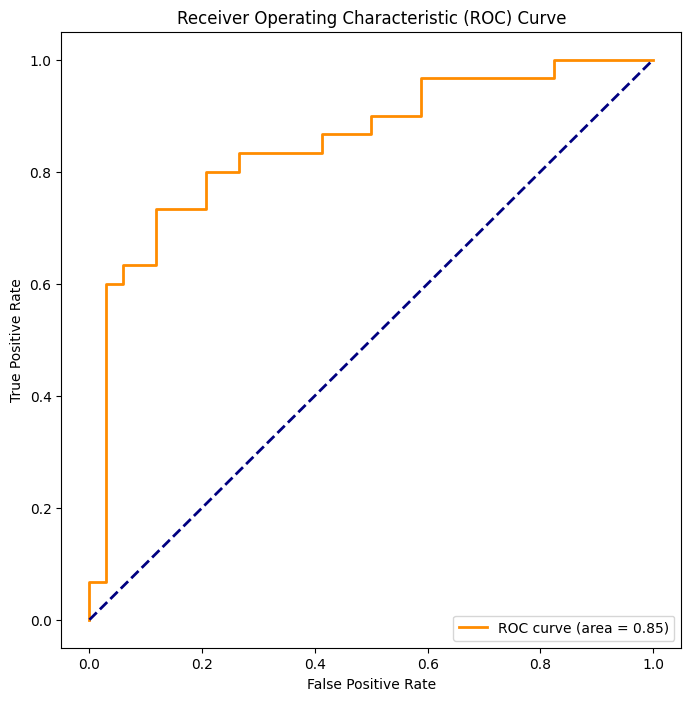

In [81]:
# Get predictions from the best model
y_pred_prob = best_model.predict(X_val)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_val, y_pred_prob)
average_precision = average_precision_score(y_val, y_pred_prob)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()